# CNN - Redes Neurais Convolucionais (Convolutional Neural Networks)

Redes Neurais Convolucionais são RNAs que têm uma arquitetura particular, baseada no sistema neural do cortex visual. Em resumo, é uma RNA na qual algumas de suas camadas realizam a convolução (operação matemática muito utilizada em processamento de imagens e apresentada em seguida) que tem demonstrado ser muito eficiente na extração de características (*features*) de dados bidimensionais (geralmente imagens).

É a arquitetura de RNA comumente utilizada nas Redes Neurais Profundas.

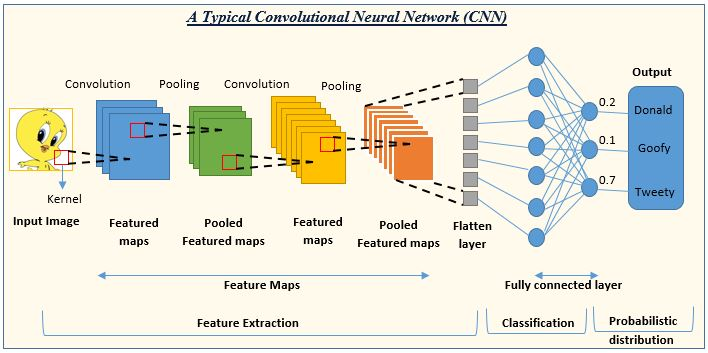

##Aplicações

As CNNs constituem a base das Redes Neurais Profundas (Deep Learning).

E as aplicações das Redes Neurais Profundas estão em praticamente todas as áreas do conhecimento e, atualmente, estão revolucionado a IA.



---



## Kernels Convolucionais

Em processamento de imagens, um *kernel* convolucional é o equivalente a aplicação de uma 'máscara'. Trata-se uma operação (convolução), representada por uma matriz,  qual é multiplicada pelos valores dos pixels da imagem original para se extrair alguma característica. Ou seja, pode, por exemplo, gerar uma nova imagem com o contraste aumentado, ou com contornos definidos, etc.

- o que é interessante nos *kernels* convolucionais é que eles preservam a relação de vizinhança/proximidade entre os pixels e é, provavelmente, esta característica que os torna tão eficientes em extrair as características das imagens.

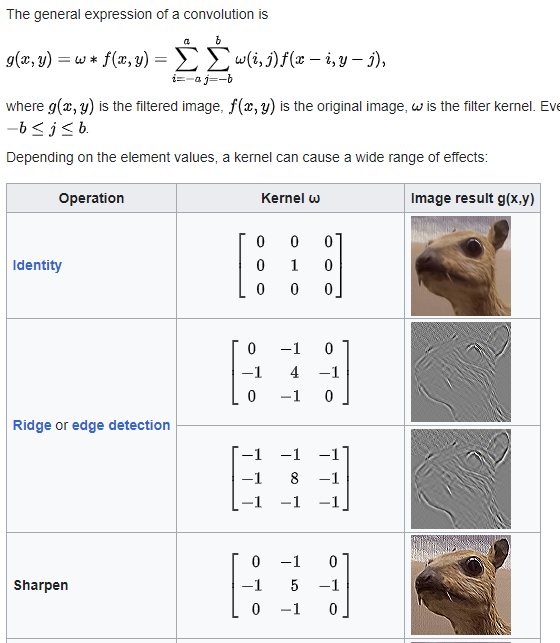


Em termos específicos, pode-se dizer que *kernels* e *filtros* convolucionais sejam a mesma coisa. Porém, os *filtros* são mais genéricos e podem, por exemplo, ser compostos de vários *kernels*.

###O cálculo do kernel

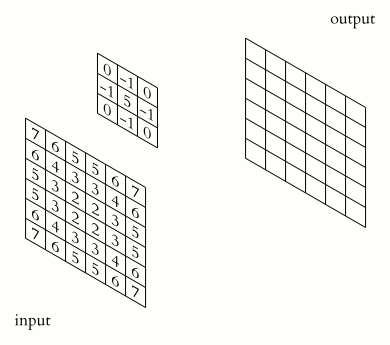

https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif

### Definições

-   **stride**

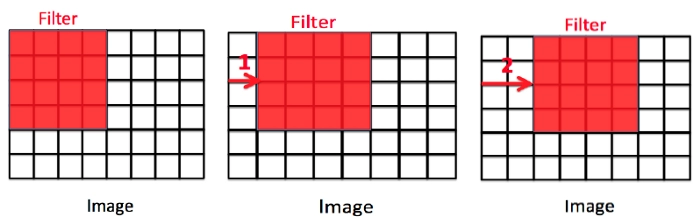

-   **padding**

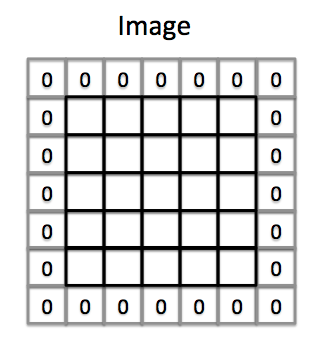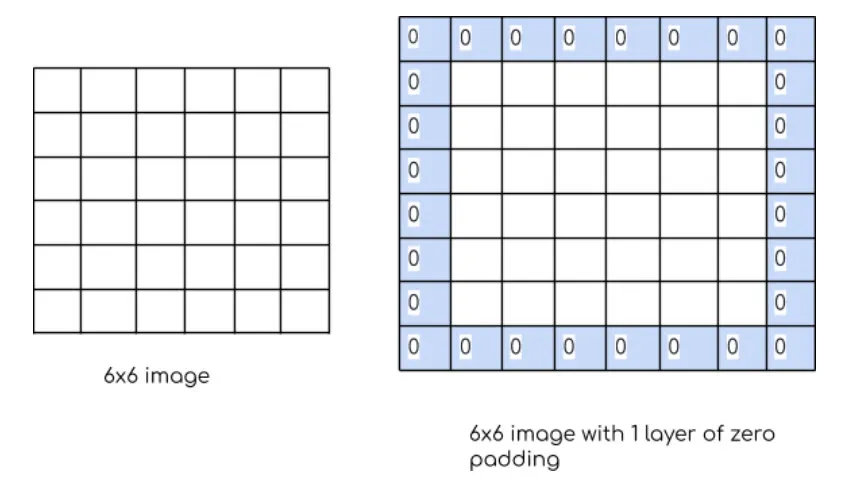

-   **Average / Max pooling**

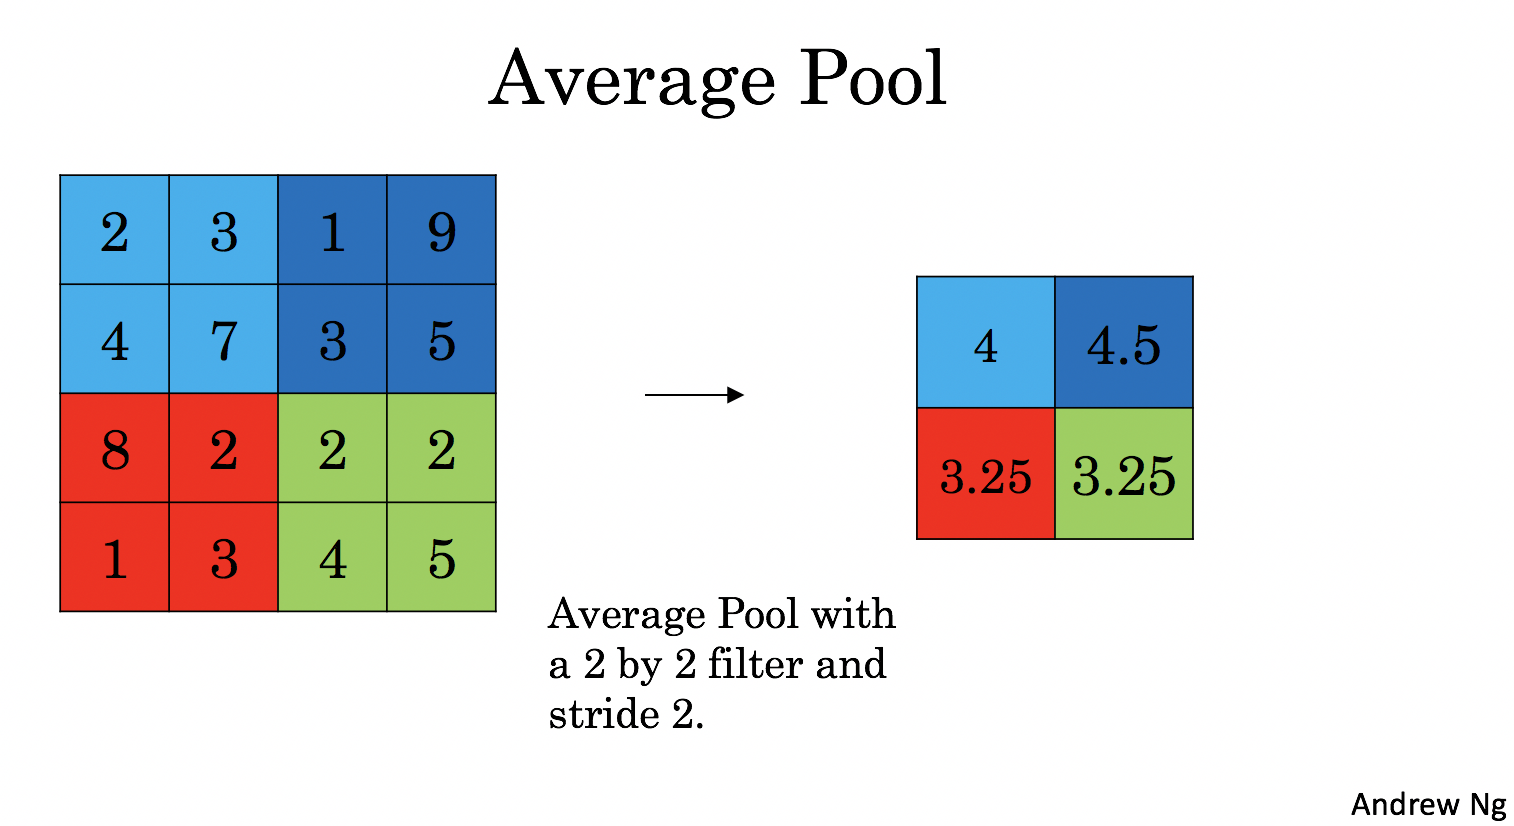

###Importando módulos e lendo dados

In [2]:
# importando módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torch.autograd.grad_mode import no_grad

In [3]:
# a princípio somente é necessário executar uma vez por sessão
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# usando o dataset do MNIST
%cd drive/MyDrive/Colab\ Notebooks/mnist

In [ ]:
## Camadas Convolucionais

In [4]:
# função para plotar convolução
def plot_conv(image, filter):
   with torch.no_grad():
    d = filter.shape[-1]
    conv = torch.nn.Conv2d(1, 1, kernel_size=(d, d), padding=1)
    conv.weight[:] = filter
    fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
    ax1.imshow(image, cmap='gray')
    ax1.axis('off')
    ax1.set_title("Original")
    ax2.imshow(conv(image[None, None, :]).detach().squeeze(), cmap='gray')
    ax2.set_title("Filtrada")
    ax2.axis('off')
    plt.tight_layout()


In [ ]:
# lendo imagem e convertendo para b-w (1 canal)
img = mpimg.imread('scarlett_200.jpg')
img = torch.from_numpy(np.dot(img[...,:3], [0.33, 0.33, 0.33]))
img = img.type(torch.float32)
plt.imshow(img,cmap='gray')
plt.axis('off')

In [ ]:
kernel_1 = torch.tensor([[0.0625,  0.1250,  0.0625],
                         [ 0.1250,  0.2500,  0.1250],
                         [ 0.0625,  0.1250,  0.0625]])

kernel_2 = torch.tensor([[ -0.1,  -0.1,   -0.1 ],
                         [ -0.1,   1.8,  -0.1],
                         [ -0.1,  -0.1,  -0.1]])

kernel_3 = torch.tensor([[ -0.25,   -0.125,   0.0 ,  0, 0],
                         [ -0.125,  -0.0625,  0.0,   0, 0],
                         [ -0.125,  -0.0625,  0,     0, 0],
                         [ -0.125,  -0.0625,  0,     0, 0],
                         [ -0.25,   -0.125,   0.,    0, 0]
                         ])

kernel_4 = torch.tensor([[2 , 1 , 0],
                          [1 , 0 ,-1],
                          [0 ,-1 ,-2]])

kernel_5 = torch.tensor([  [0 , 0 , 0],
                           [0 , -1 ,0],
                           [0 , 0 , 0]])

plot_conv(img, kernel_3)

In [ ]:
# porponham um kernel que detecta linhas diagonais \

kernel_diag = torch.tensor([[

                         ])

plot_conv(img, kernel_inv)



---



###O papel dos kernels na *features extraction*

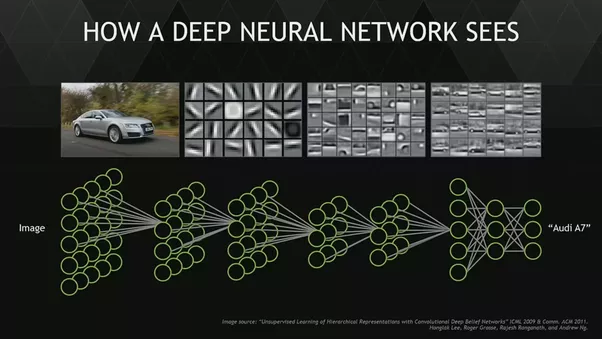



---



##LeNet-5

LeNet-5 foi apresentada por LeCun et alii em 1998 no Proc. do IEEE.

Neste artigo clássico, os autores demonstram como esta nova arquitetura de RNA (composta por camadas convolucionais) pode ser mais precisa no reconhecimento de dígitos do que outras técnicas de reconhecimennto de padrões (incluindo as RNA multicamadas) e, ao mesmo tempo, ser mais eficiente em termos de memória.

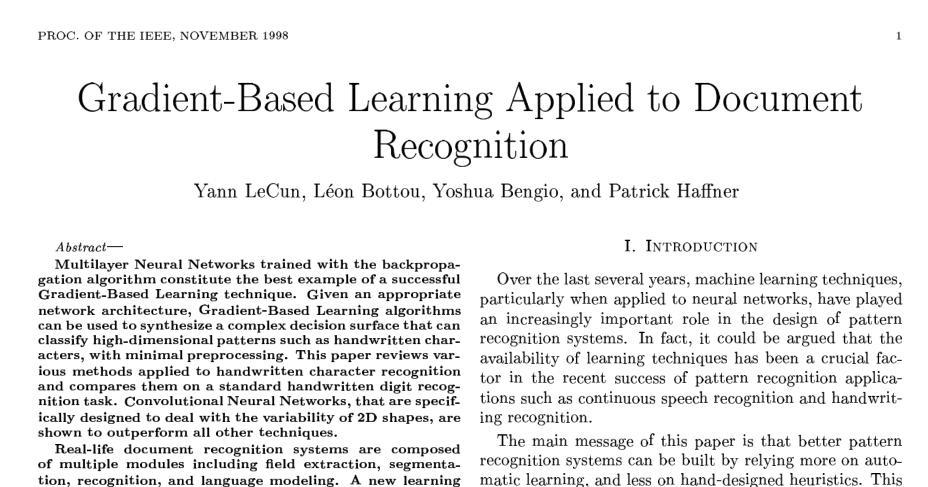


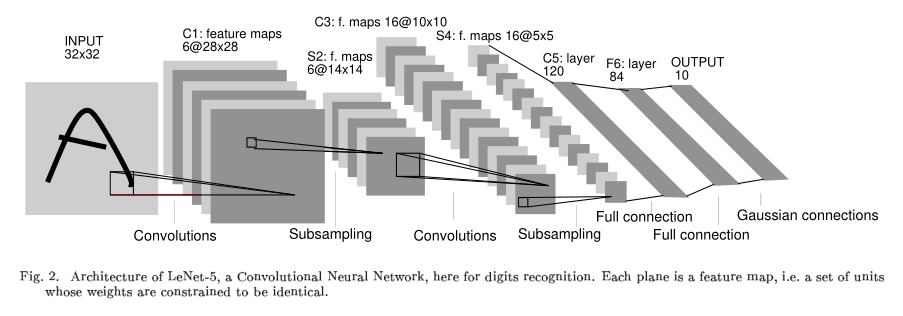

## Exemplo - aplicando LeNet-5 no MNIST

In [5]:
# lendo arquivos de dados
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [6]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ajustando a entrada de 28x28 para 32x32

Dígito (label):  5


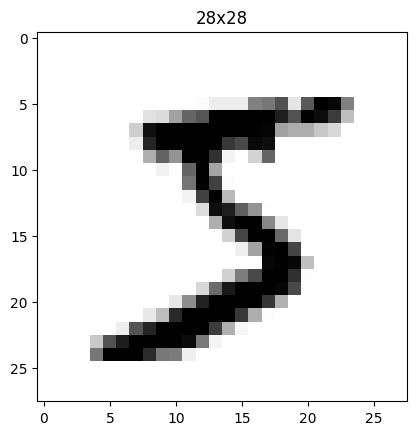

In [7]:
# visualizando os dados de um exemplo (1 linha no txx_data)
index = 0  # qualquer imagem dentre as 60000 de treino
image = train_data.iloc[index, 1:].values.astype(np.uint8).reshape((28, 28, 1))
label = train_data.iloc[index, 0]
print('Dígito (label): ',label)
plt.title('28x28')
plt.imshow(image.reshape(28,28),cmap='binary')

In [ ]:
# trabalhar com o torch deve-se estar sempre atento às shapes dos tensores
X_train = torch.tensor(train_data.iloc[:,1:].values, dtype=torch.float32)
X_train.shape

In [ ]:
# visualizando em cinza da modificação - borda adicionada ( 28x28 -> 32x32 )
hor66 = torch.ones(60000,66)*100
hor4 = torch.ones(60000,4)*100

Xt = torch.cat((X_train[:,756:],hor66),1)
for ind in range(756,3,-28):
  Xt = torch.cat((X_train[:,ind-28:ind],hor4,Xt),1)
Xt = torch.cat((hor66, Xt),1)

Xt.shape

In [ ]:
# visualizando os dados de um exemplo (1 linha no txx_data)
index = 0  # qualquer imagem dentre as 60000 de treino
image = Xt[index, :].reshape((32, 32, 1))
label = train_data.iloc[index, 0]
print('Dígito (label): ',label)
plt.title('32x32')
plt.imshow(image.reshape(32,32),cmap='binary')

In [ ]:
# ajustando a entrada da RNA (tensores e 32x32)
X_train = torch.tensor(train_data.iloc[:,1:].values, dtype=torch.float32)
X_test = torch.tensor(test_data.iloc[:,1:].values, dtype=torch.float32)
qTrain = X_train.shape[0]
qTest = X_test.shape[0]

# training
hor66 = torch.zeros(qTrain,66)
hor4 = torch.zeros(qTrain,4)
Xtr = torch.cat((X_train[:,756:],hor66),1)
for ind in range(756,3,-28):
  Xtr = torch.cat((X_train[:,ind-28:ind],hor4,Xtr),1)
Xtr = torch.cat((hor66, Xtr),1)

# testing
hor66 = torch.zeros(qTest,66)
hor4 = torch.zeros(qTest,4)
Xts = torch.cat((X_test[:,756:],hor66),1)
for ind in range(756,3,-28):
  Xts = torch.cat((X_test[:,ind-28:ind],hor4,Xts),1)
Xts = torch.cat((hor66, Xts),1)

Xtr =torch.reshape(Xtr,(qTrain,32,32))
Xts =torch.reshape(Xts,(qTest,32,32))

Xtr.shape, Xts.shape

In [ ]:
# separando as saídas (classes)
Ytr = torch.tensor(pd.get_dummies(train_data['label']).values, dtype=torch.float32)
Yts = torch.tensor(pd.get_dummies(test_data['label']).values, dtype=torch.float32)
Ytr.shape, Yts.shape

###Criando o modelo

In [ ]:
torch.manual_seed(1945)

class LeNet5(nn.Module):
    def __init__(self, dim_saida):
        super(LeNet5, self).__init__()
        self.CN_1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0),
            #nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.CN_2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
            #nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu1 = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu2 = nn.ReLU()
        self.fc2 = nn.Linear(84, dim_saida)
        #self.sfmx = nn.Softmax(dim=1)

    def forward(self, x):
        y = self.CN_1(x)
        y = self.CN_2(y)
        y = y.reshape(y.size(0), -1) # linearizando
        y = self.fc(y)
        y = self.relu1(y)
        y = self.fc1(y)
        y = self.relu2(y)
        y = self.fc2(y)
#        y = self.sfmx(y)
        return y

model = LeNet5(10)
print(model)

In [ ]:
# modelagem alternativa - camada por camada
torch.manual_seed(1945)

model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
    nn.Flatten(),
    nn.Linear(16*5*5, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10)
)

print(model)

###Selecionando Otimizador e Custo

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.02) #optim.Adam(model.parameters(), lr=0.001)

fn_loss = nn.CrossEntropyLoss()

###Treinamento / Aprendizagem

In [ ]:
# dataloader
batch1 = 5000
batch2 = 5000
trainDataset = DataLoader(list(zip(Xtr,Ytr)), batch_size=batch1, shuffle=True)
testDataset = DataLoader(list(zip(Xts,Yts)), batch_size=batch2, shuffle=False)

# listas para registro do treinamento
trainLoss = []
testLoss = []
trainPredictOK = []
testPredictOK = []

n_epocas = 50

In [ ]:
# treinamento

for epoca in range(n_epocas):
  trainOK = 0
  testOK = 0

  for (X_train, y_train) in trainDataset:
    X_train = torch.reshape(X_train,(batch1,1,32,32))
    y_pred = model(X_train)
    loss = fn_loss(y_pred, y_train)

    predicted = torch.max(y_pred.data,1)[1]
    batchOK = (predicted == torch.max(y_train,1)[1]).sum()
    trainOK = trainOK + batchOK

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  trainLoss.append(loss.item())
  trainPredictOK.append(trainOK/qTrain)

  with torch.no_grad():
    for (X_test, y_test) in testDataset:
      X_test = torch.reshape(X_test,(batch2,1,32,32))
      y_pred = model(X_test)
      predicted2 = torch.max(y_pred.data, 1)[1]
      batchOK = (predicted2 == torch.max(y_test,1)[1]).sum()
      testOK = testOK + batchOK

    loss2 = fn_loss(y_pred, y_test)
    testLoss.append(loss2.item())
    testPredictOK.append(testOK/qTest)

  if (epoca == 0):
    print('Época\tTrainLoss\tTestLoss\tAccurTrain\tAccurTest')
    print(f'{epoca} \t {trainLoss[-1]:.4f}\t\t {testLoss[-1]:.4f}\t\t{trainPredictOK[-1]:.4f}\t\t{testPredictOK[-1]:.4f}')
  elif (epoca%5 == 0):
    print(f'{epoca} \t {trainLoss[-1]:.4f}\t\t {testLoss[-1]:.4f}\t\t{trainPredictOK[-1]:.4f}\t\t{testPredictOK[-1]:.4f}')


In [ ]:
# mostrando o processo de aprendizado
plt.plot(testPredictOK,'red', label='Teste')
plt.plot(trainPredictOK, label='Treino')
plt.grid()
plt.legend()

In [ ]:
plt.plot(testLoss,'red',label='Teste')
plt.plot(trainLoss,label='Treino')
plt.grid()
plt.legend()
plt.title('Loss')



---



##Atividade de consolidação do conhecimento

No artigo de Tsang, webpage https://sh-tsang.medium.com/paper-brief-review-of-lenet-1-lenet-4-lenet-5-boosted-lenet-4-image-classification-1f5f809dbf17, há uma revisão básica das LeNet's - Nesta wegpage as arquiteturas e seus respectivos desempenhos na classificação do MNIST são apresentados.

Algo que considero bastante interessante seria adaptar os códigos (notebooks) disponibilizados e trabalhados na disciplina para reproduzir (implementar, treinar e verificar a eficiência dessas outras arquiteturas) usando os exemplos/resultados mostrados no artigo como referência.

Para cada uma das arquiteturas revisadas no artigo, calcule a quantidade de conexões (pesos) e analise se essa info pode dar algum insight à eficiência do tempo de aprendizado e do uso de memória das CNNs.